<a href="https://colab.research.google.com/github/bingsen-wang/Math/blob/main/Integration_sine_anim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1><b>Sine Integration</h1></b>

Dr. Bingsen Wang

4/14/2025
</center>

#Python Code

1.9835235375094549


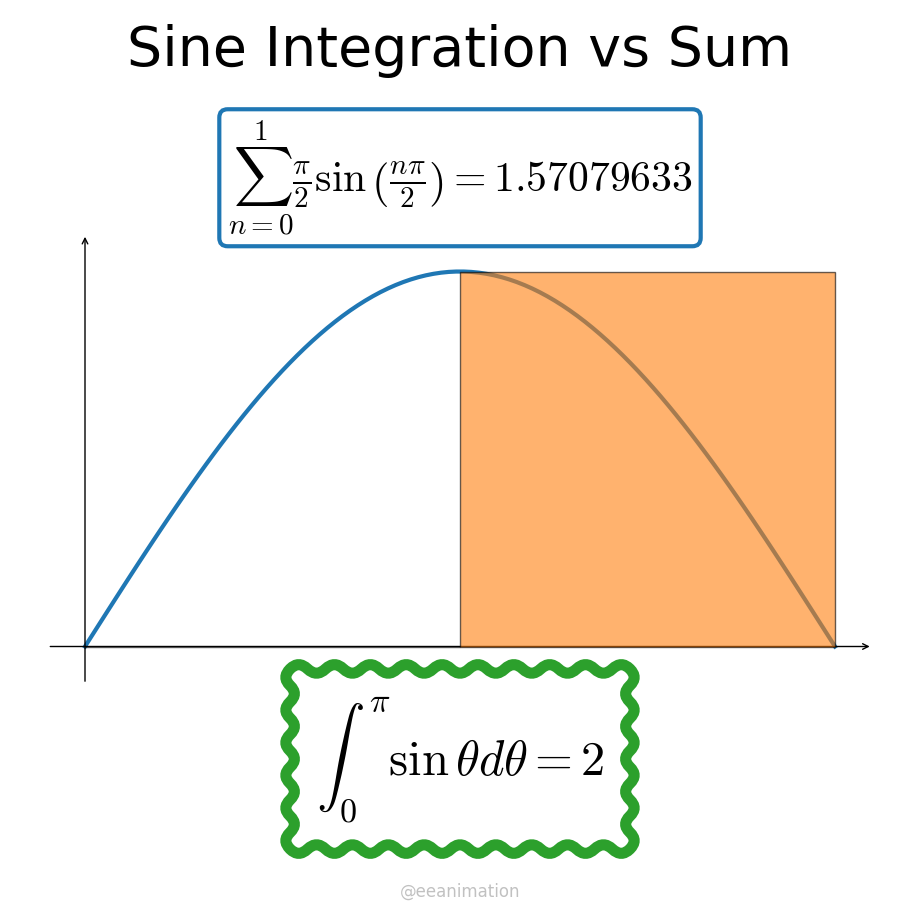

In [ ]:
from matplotlib import pyplot,animation,cm,patches,path
import numpy as np
pyplot.rcParams.update({"font.family":"sans-serif", "mathtext.fontset":"cm"})
def sine_sum(n):
  return np.sum(np.sin(np.linspace(0,n-1,n)*np.pi/n))*np.pi/n
print(sine_sum(10))
cl = list(cm.tab10.colors) #colors of lines
fig = pyplot.figure(figsize=([9,9]))
xylim=[-1.2,1.2]
ax = fig.add_axes([0,0,1,1],xlim=xylim,ylim=xylim); ax.axis('off')
ax1 = fig.add_axes([0,0,1,1],xlim=xylim,ylim=xylim,fc='none');ax1.axis('off')
ax.text(0,1.05,"Sine Integration vs Sum",size=40,ha='center')
xy=np.array([-1,-.5])
ax.annotate('',xy+np.array([2.1,0]),xy+np.array([-.1,0]),arrowprops=dict(arrowstyle='->',lw=1))
ax.annotate('',xy+np.array([0,1.1]),xy+np.array([0,-.1]),arrowprops=dict(arrowstyle='->',lw=1))
t=np.linspace(0,np.pi,100)
ax.plot(t/np.pi*2+xy[0],np.sin(t)+xy[1],color=cl[0],lw=3)
ax.text(0,-.8,r'$\int_{0}^{\pi}\sin\theta d\theta=2$', size=35,ha='center',va='center',
        bbox=dict(boxstyle='roundtooth',pad=.7,facecolor='none',edgecolor=cl[2],lw=8))
txt=ax.text(0,xy[1]+1.25,'text',size=30,ha='center',va='center',bbox=dict(boxstyle='round',pad=.2,facecolor='none',edgecolor=cl[0],lw=3))
def animate(i):
  ax1.cla(); ax1.axis('off');ax1.set_xlim(xylim); ax1.set_ylim(xylim)
  n=i+2
  k=np.linspace(0,n-1,n)
  for k in range(n):
    pts=np.array([(k*np.pi/n/np.pi*2,0),(k*np.pi/n/np.pi*2,np.sin(k*np.pi/n)),((k+1)*np.pi/n/np.pi*2,np.sin(k*np.pi/n)),((k+1)*np.pi/n/np.pi*2,0)])
    verts=[p+xy for p in pts]+[(0,0)]
    codes=[patches.Path.MOVETO]+[patches.Path.LINETO]*(len(verts)-2)+[patches.Path.CLOSEPOLY]
    ax1.add_patch(patches.PathPatch(path.Path(verts,codes),fc=cl[k%len(cl)],ec='k',zorder=2,alpha=.6))
    txt.set_text(rf'$\sum_{{n=0}}^{{{n-1}}}\frac{{\pi}}{{{n}}}\sin\left(\frac{{n\pi}}{{{n}}}\right)={sine_sum(n):.8f}$')
  return
ax.text(np.average(ax.get_xlim()),ax.get_ylim()[0]*.99+ax.get_ylim()[1]*.01,r'@eeanimation',size=12,c='.2',alpha=.3,ha='center',va='bottom')
anim = animation.FuncAnimation(fig, animate, frames=100, interval=20)
anim.save("sineSum.mp4",writer=animation.FFMpegWriter(fps=10),dpi=200)